In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#LECTURE DU fichier avec pandas
df=pd.read_csv("titanic-passengers.csv",encoding="iso.8859-1",sep=";")

#affichage des 5 premiers elements du tableau
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
# recherche des informations manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# on remplace les donnees manquantes par la moyenne
df['Age'].fillna(df['Age'].mean(),inplace=True)
# on remplace les manquantes par la mode
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#verification
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

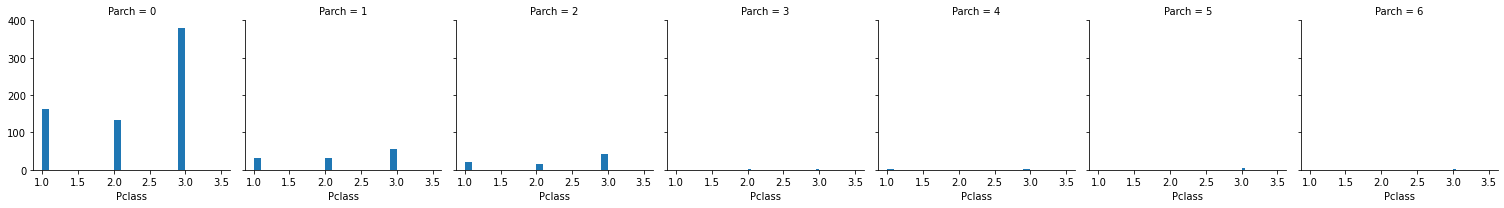

In [10]:
# etude  de la distribution des carcteristiques les plus importantes
g=sns.FacetGrid(df,col='Parch')
g.map(plt.hist,'Pclass',bins=20)

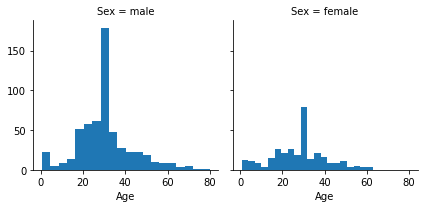

In [11]:
#correlation entre
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=20)

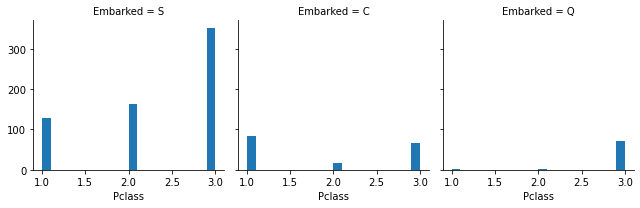

In [12]:
# Question 2 on choisit 2 autres caracteristiques

# correlation entre Embarked et Pclass
g=sns.FacetGrid(df,col='Embarked')
g.map(plt.hist,'Pclass',bins=20)

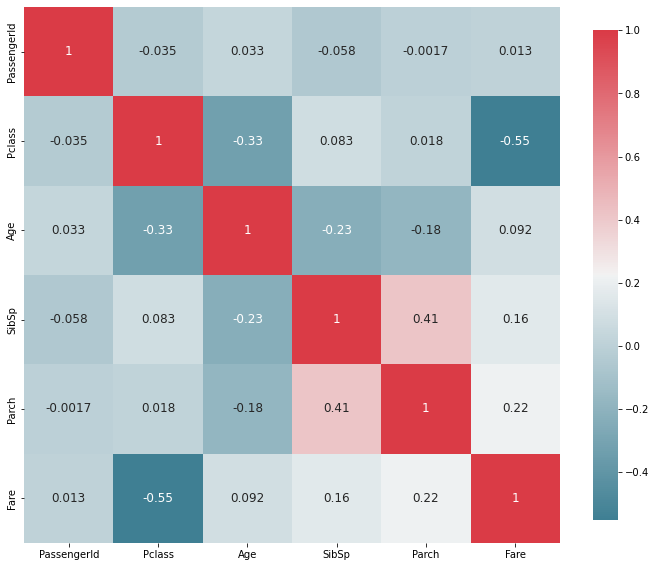

In [13]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap, 

        square=True, 
        
        cbar_kws={ 'shrink' : .9 },
        
        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [14]:
# on utilise groupby et mean 
df.groupby(['Pclass','Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  40.896074  0.287500  0.300000  64.684007
       Yes        491.772059  34.784615  0.492647  0.389706  95.608029
2      No         452.123711  33.266947  0.319588  0.144330  19.412328
       Yes        439.080460  26.076166  0.494253  0.643678  22.055700
3      No         453.580645  27.417500  0.672043  0.384409  13.669364
       Yes        394.058824  23.232689  0.436975  0.420168  13.694887

In [15]:
# on suprime la colonne Name
df.drop(['Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,male,28.000000,0,0,248740,13.0000,B96 B98,S
1,76,No,3,male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,male,20.000000,0,0,350050,7.8542,B96 B98,S
3,568,No,3,female,29.000000,0,4,349909,21.0750,B96 B98,S
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,B96 B98,C
887,61,No,3,male,22.000000,0,0,2669,7.2292,B96 B98,C
888,535,No,3,female,30.000000,0,0,315084,8.6625,B96 B98,S
889,102,No,3,male,29.699118,0,0,349215,7.8958,B96 B98,S
